In [1]:
# Load the cleaned dataset used for model training
import pandas as pd

df = pd.read_csv("C:/Users/HP/Desktop/HR ATTRITION PROJECT/data/cleaned_data/cleaned_hr_data.csv")
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,0,94,3,2,...,0,0,0,0,0,0,1,0,0,1
1,49,0,279,8,1,3,1,61,2,2,...,0,0,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,4,1,92,2,1,...,0,1,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,4,0,56,3,1,...,0,0,0,0,0,1,0,0,1,0
4,27,0,591,2,1,1,1,40,3,1,...,0,1,0,0,0,0,0,0,1,0


In [2]:
# Separate features (X) and target (y)
X = df.drop("Attrition", axis=1)
y = df["Attrition"]


In [3]:
# Display first five rows of the feature set
X.head()


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1102,1,2,2,0,94,3,2,4,...,0,0,0,0,0,0,1,0,0,1
1,49,279,8,1,3,1,61,2,2,2,...,0,0,0,0,0,1,0,0,1,0
2,37,1373,2,2,4,1,92,2,1,3,...,0,1,0,0,0,0,0,0,0,1
3,33,1392,3,4,4,0,56,3,1,3,...,0,0,0,0,0,1,0,0,1,0
4,27,591,2,1,1,1,40,3,1,2,...,0,1,0,0,0,0,0,0,1,0


In [4]:
# Display first five rows of the target variable
y.head()


0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (80% training, 20% testing)
# Using stratify=y to maintain the same distribution of the target variable (Attrition) in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [6]:
# 📌 Scale the features for model training
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform on training data, transform on test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
# Import the model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model to training data
log_reg.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [8]:
# Predict on test data
y_pred = log_reg.predict(X_test_scaled)

# Evaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.8605442176870748

Confusion Matrix:
 [[237  10]
 [ 31  16]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.62      0.34      0.44        47

    accuracy                           0.86       294
   macro avg       0.75      0.65      0.68       294
weighted avg       0.84      0.86      0.84       294



In [9]:
# Import the model
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier
rf_model = RandomForestClassifier(random_state=42)

# Fit the model
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [10]:
# Predict on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Accuracy Score: 0.8333333333333334

Confusion Matrix:
 [[241   6]
 [ 43   4]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       247
           1       0.40      0.09      0.14        47

    accuracy                           0.83       294
   macro avg       0.62      0.53      0.52       294
weighted avg       0.78      0.83      0.79       294



In [11]:
# Initialize Random Forest with class weight balanced
rf_balanced = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_balanced.fit(X_train_scaled, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [12]:
# Make predictions
y_pred_rf_balanced = rf_balanced.predict(X_test_scaled)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred_rf_balanced))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_balanced))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_balanced))


Accuracy Score: 0.8333333333333334

Confusion Matrix:
 [[241   6]
 [ 43   4]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       247
           1       0.40      0.09      0.14        47

    accuracy                           0.83       294
   macro avg       0.62      0.53      0.52       294
weighted avg       0.78      0.83      0.79       294



In [13]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate scale_pos_weight to handle imbalance
# Formula: (number of negative class) / (number of positive class)
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

# Initialize and train the XGBoost model
xgb_model = XGBClassifier(eval_metric='logloss', scale_pos_weight=scale_pos_weight, random_state=42)
xgb_model.fit(X_train_scaled, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [14]:
# Predictions
y_pred = xgb_model.predict(X_test_scaled)

# Evaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.8673469387755102

Confusion Matrix:
 [[236  11]
 [ 28  19]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92       247
           1       0.63      0.40      0.49        47

    accuracy                           0.87       294
   macro avg       0.76      0.68      0.71       294
weighted avg       0.85      0.87      0.85       294



In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Extract feature importances from the trained XGBoost model
feature_importances = xgb_model.feature_importances_

# Step 2: Match importances to feature names
feature_names = X.columns  # X should be the original unscaled feature set
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feature_importances
})

# Step 3: Sort features by importance
importance_df = importance_df.sort_values(by="Importance", ascending=False)


C:\Users\HP\AppData\Local\Temp\ipykernel_14684\693895467.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(20), x="Importance", y="Feature", palette="viridis")


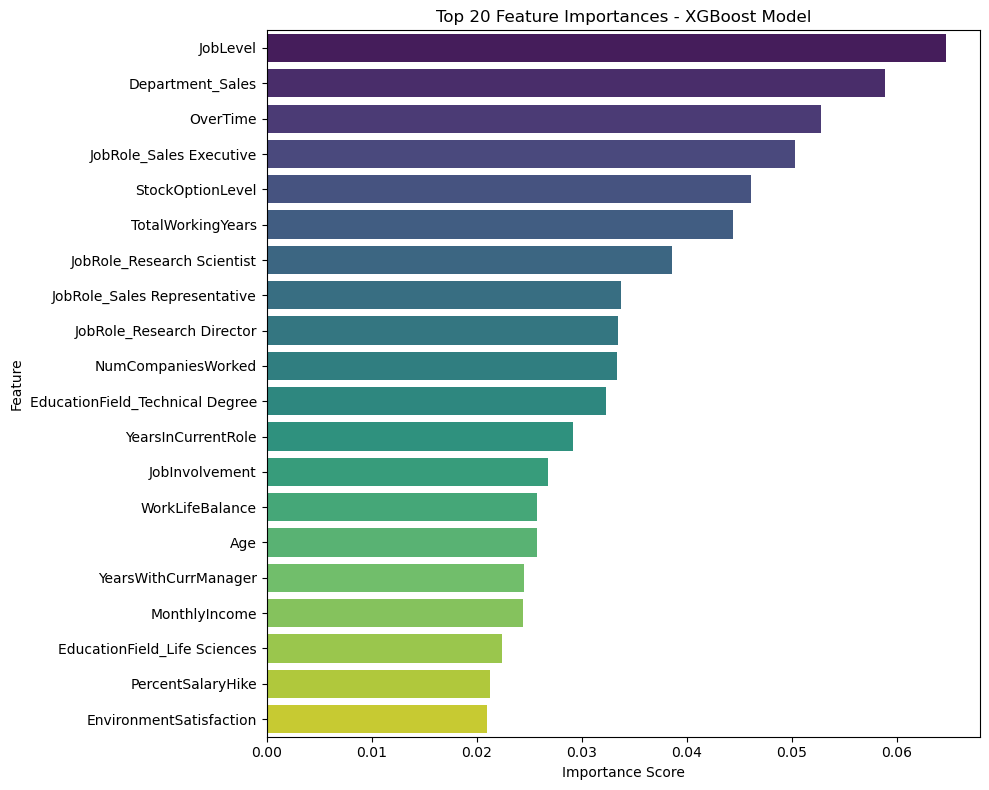

In [16]:
# Step 4: Visualize top 20 important features
plt.figure(figsize=(10, 8))
sns.barplot(data=importance_df.head(20), x="Importance", y="Feature", palette="viridis")
plt.title("Top 20 Feature Importances - XGBoost Model")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [17]:
# Experiment: Training XGBoost using only the top 20 features
# Purpose: To evaluate if a simpler model (using fewer features) could match or outperform the full model

# Select top 20 features
top_features = importance_df.head(20)["Feature"].tolist()

# Subset the dataset with only top features
X_top = X[top_features]

# Split the dataset again
from sklearn.model_selection import train_test_split

X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(
    X_top, y, test_size=0.2, random_state=42, stratify=y
)


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_top_scaled = scaler.fit_transform(X_train_top)
X_test_top_scaled = scaler.transform(X_test_top)


In [19]:
from xgboost import XGBClassifier

xgb_top_model = XGBClassifier(eval_metric='logloss', scale_pos_weight=scale_pos_weight, random_state=42)
xgb_top_model.fit(X_train_top_scaled, y_train_top)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [20]:
# Predict
y_pred_top = xgb_top_model.predict(X_test_top_scaled)

# Evaluate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy Score:", accuracy_score(y_test_top, y_pred_top))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_top, y_pred_top))
print("\nClassification Report:\n", classification_report(y_test_top, y_pred_top))


Accuracy Score: 0.826530612244898

Confusion Matrix:
 [[226  21]
 [ 30  17]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.90       247
           1       0.45      0.36      0.40        47

    accuracy                           0.83       294
   macro avg       0.67      0.64      0.65       294
weighted avg       0.81      0.83      0.82       294



## Experiment: XGBoost with Top 20 Features

To potentially improve model efficiency and interpretability, I performed feature importance analysis and selected the top 20 most influential features. The model was retrained using only these features.

However, the reduced model yielded slightly lower performance compared to the original XGBoost model trained with all features.

This experiment is retained here to demonstrate model evaluation efforts and justify the final model selection.


In [21]:
import joblib


In [22]:
# Save the trained XGBoost model
#joblib.dump(xgb_model, '../attrition_model/xgboost_model.pkl')

# Commented out after the first save 

In [23]:
# Save the fitted scaler
#joblib.dump(scaler, '../attrition_model/scaler.pkl')

# Commented out after the first save 

### 🔁 Exporting Predictions for Power BI

Now that the model is trained and tested, we'll generate predicted attrition values 
and export them for Power BI. This allows us to build an interactive dashboard showing 
which employees are most at risk of leaving.


In [25]:
# ------------------------------------------
# 🟨 STEP: Generate Predictions for Power BI
# ------------------------------------------
# Why?
# After building and evaluating the model, we want to visualize its predictions
# (i.e., who is likely to leave) in Power BI. To do this, we:
# - Predict attrition on the test set
# - Add the results to a readable table
# - Export as a CSV for dashboard use

# Predict class labels
y_pred_for_export = xgb_model.predict(X_test_scaled)

# Predict probabilities of attrition (how likely they are to leave)
y_probs_for_export = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Build a readable DataFrame using the original (unscaled) test data
results_df = X_test.copy()
results_df['Predicted_Attrition'] = y_pred_for_export
results_df['Attrition_Probability'] = y_probs_for_export
results_df['Actual_Attrition'] = y_test.values

# Optional: Map binary columns back to readable form
if 'Gender' in results_df.columns:
    results_df['Gender'] = results_df['Gender'].map({1: 'Male', 0: 'Female'})

if 'OverTime' in results_df.columns:
    results_df['OverTime'] = results_df['OverTime'].map({1: 'Yes', 0: 'No'})

# Map prediction and actual labels to Yes/No
results_df['Predicted_Attrition'] = results_df['Predicted_Attrition'].map({1: 'Yes', 0: 'No'})
results_df['Actual_Attrition'] = results_df['Actual_Attrition'].map({1: 'Yes', 0: 'No'})


# ------------------------------------------
# 🟨 STEP: Reverse Dummy Variables to Categories
# ------------------------------------------
# Why?
# Power BI works best with readable labels.
# This step will re-create original categorical columns from their one-hot encoded versions
# such as JobRole, Department, BusinessTravel, etc.

def reverse_dummies(df, prefix):
    """
    Converts one-hot encoded columns back to a single categorical column.
    Example: JobRole_Sales Exec, JobRole_Manager → JobRole
    """
    dummy_cols = [col for col in df.columns if col.startswith(prefix + '_')]
    if dummy_cols:
        df[prefix] = df[dummy_cols].idxmax(axis=1).str.replace(prefix + '_', '', regex=False)
        df.drop(columns=dummy_cols, inplace=True)

# Reverse common categorical variables
reverse_dummies(results_df, 'JobRole')
reverse_dummies(results_df, 'Department')
reverse_dummies(results_df, 'BusinessTravel')
reverse_dummies(results_df, 'EducationField')
reverse_dummies(results_df, 'MaritalStatus')

# ------------------------------------------
# ✅ Final Export
# ------------------------------------------
results_df.to_csv('predicted_attrition_results.csv', index=False)

# ✅ This file is now ready to be used in Power BI for dashboard visualization
